# Préparation des données et analyse exploratoire

In [5]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from django.contrib.admin import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Configuration pour les graphiques
sns.set(style="whitegrid")

In [6]:
#cd C:\Users\donfa\OneDrive\Desktop\TP ELECTRONIQUE

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = pd.read_csv('Rendement.csv')

# Encodage de la colonne catégorique 'Crop' en utilisant One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Crop'], drop_first=True)

# Séparation des caractéristiques (features) et de la cible (target)
X = data_encoded.drop("Yield", axis=1)
y = data_encoded["Yield"]

# Standardisation des données
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
sc_y = StandardScaler()
#y=sc_y.fit_transform(y)

# Conversion en DataFrame pour la lisibilité (optionnel)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
data=X_scaled_df
# Aperçu des données traitées
print("Données après encodage et standardisation :")
X_scaled_df.head()


Données après encodage et standardisation :


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,-0.823415,-1.648845,-1.347084,-0.667109,-0.57735,-0.57735,-0.57735
1,-1.899565,-2.263223,-2.646141,-0.282807,-0.57735,-0.57735,-0.57735
2,-0.641042,-1.341656,-1.961367,0.216786,-0.57735,-0.57735,-0.57735
3,0.366865,-2.024299,0.334641,-2.396470,-0.57735,-0.57735,-0.57735
4,-0.491386,-2.024299,-0.622029,-1.627865,-0.57735,-0.57735,-0.57735


In [8]:
# Résumé statistique
print("Résumé statistique :")
data.describe()

Résumé statistique :


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,1.231921e-15,-5.277829e-15,9.889525e-15,4.907755e-15,4.554761e-17,-4.554761e-17,-9.109522e-17
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.912735e+00,-2.263223e+00,-2.646141e+00,-2.396470e+00,-5.773503e-01,-5.773503e-01,-5.773503e-01
25%,-6.360164e-01,-5.907486e-01,-6.220290e-01,-6.286791e-01,-5.773503e-01,-5.773503e-01,-5.773503e-01
50%,-2.147065e-01,2.284228e-01,1.130962e-01,-2.059466e-01,-5.773503e-01,-5.773503e-01,-5.773503e-01
75%,8.026274e-01,6.721406e-01,7.777299e-01,4.473673e-01,0.000000e+00,0.000000e+00,0.000000e+00
max,2.077059e+00,1.696105e+00,1.371872e+00,2.407309e+00,1.732051e+00,1.732051e+00,1.732051e+00


In [9]:
# Vérification des valeurs manquantes
print("Valeurs manquantes :")
print(data.isnull().sum())


Valeurs manquantes :
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Crop_Oil palm fruit                     0
Crop_Rice, paddy                        0
Crop_Rubber, natural                    0
dtype: int64


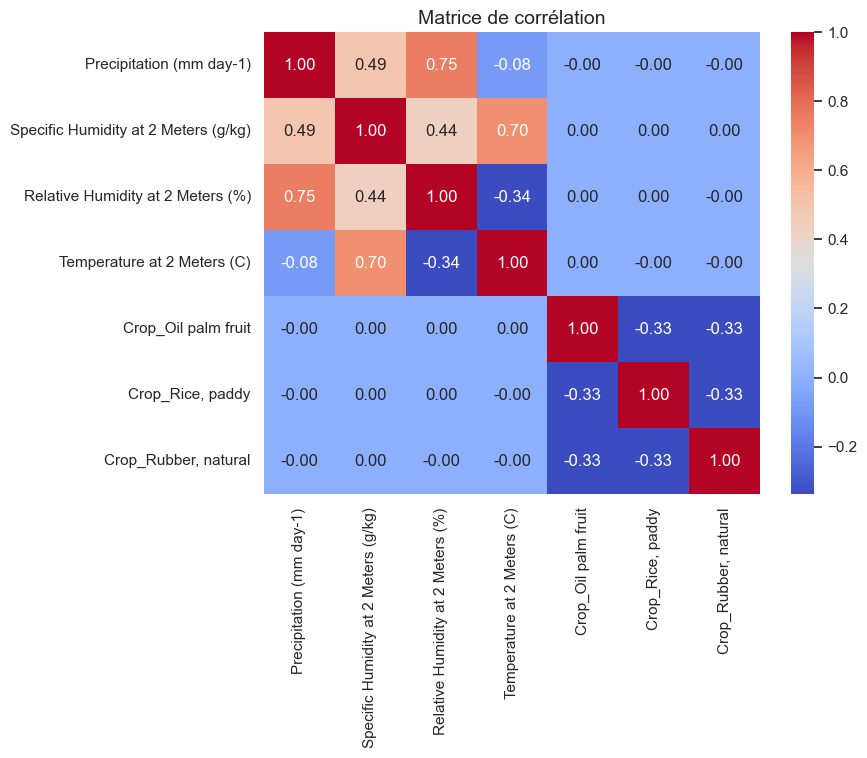

In [10]:
# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation", fontsize=14)
plt.show()


In [11]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = X_scaled_df
y=y
X_scaled = X

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## REGRESSION LINEAIRE

In [12]:
# Modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = lr.predict(X_test)
print("Régression linéaire:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Régression linéaire:
MSE: 19308693.244844027
R2 Score: 0.995022213385473


### ON CONSTATE UN SCORE ENORME ! ET UNE ERREUR PROCHE DE 0

## RANDOM FOREST

In [13]:
# Modèle de forêt aléatoire
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_rf = rf.predict(X_test)
print("Forêt aléatoire:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Forêt aléatoire:
MSE: 23879345.10501562
R2 Score: 0.9938438980349353


### ERREUR PLUS GRANDE QU'AVEC LA REGRESSION LINEAIRE

## DESCISION THREE REGRESSOR 

In [14]:
# Importation du modèle
from sklearn.tree import DecisionTreeRegressor

# Initialisation et entraînement du modèle
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor:
MSE: 28263542.71875
R2 Score: 0.9927136506422012


In [15]:
# Importation des outils pour la transformation polynomiale
from sklearn.preprocessing import PolynomialFeatures

# Transformation des données avec un degré 2 (par défaut)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entraînement du modèle linéaire sur les données transformées
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Prédictions et évaluation
y_pred_poly = lr_poly.predict(X_test_poly)
print("Régression polynomiale (degré 2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))


Régression polynomiale (degré 2):
MSE: 85490288.0625
R2 Score: 0.9779605794036218


In [16]:
# Fonction pour calculer l'erreur relative moyenne (MRE)
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcul des erreurs relatives pour chaque modèle
results = {
    "Linear Regression": {
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "MRE (%)": mean_relative_error(y_test, y_pred),
    },
    "Random Forest Regressor": {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "R2": r2_score(y_test, y_pred_rf),
        "MRE (%)": mean_relative_error(y_test, y_pred_rf),
    },
    "Decision Tree Regressor": {
        "MSE": mean_squared_error(y_test, y_pred_dt),
        "R2": r2_score(y_test, y_pred_dt),
        "MRE (%)": mean_relative_error(y_test, y_pred_dt),
    },
    "Polynomial Regression (degree 2)": {
        "MSE": mean_squared_error(y_test, y_pred_poly),
        "R2": r2_score(y_test, y_pred_poly),
        "MRE (%)": mean_relative_error(y_test, y_pred_poly),
    },
}

# Conversion en DataFrame pour affichage
results_df = pd.DataFrame(results).T
print("Résumé des performances des modèles avec erreur relative:")
display(results_df)


Résumé des performances des modèles avec erreur relative:


,MSE,R2,MRE (%)
Linear Regression,1.930869e+07,0.995022,14.171390
Random Forest Regressor,2.387935e+07,0.993844,7.365145
Decision Tree Regressor,2.826354e+07,0.992714,10.834149
Polynomial Regression (degree 2),8.549029e+07,0.977961,45.791802


# un model de regression Lineaire semble donc etre le bon predicteur

In [17]:
import numpy as np
import pandas as pd

# Fonction de prédiction spécifique au jeu de données
def predict_yield(
    model, 
    scaler_X, 
    precipitation, 
    specific_humidity, 
    relative_humidity, 
    temperature, 
    crop=None
):
    """
    Prédit le rendement agricole en fonction des données d'entrée spécifiques au jeu de données.

    Args:
    - model : Modèle entraîné (ex. RandomForestRegressor).
    - scaler_X : StandardScaler utilisé pour normaliser les caractéristiques.
    - precipitation : Précipitations (mm day-1).
    - specific_humidity : Humidité spécifique (g/kg).
    - relative_humidity : Humidité relative (%).
    - temperature : Température (C).
    - crop : Nom de la culture (ex. 'Oil palm fruit', None si aucune culture).

    Returns:
    - Rendement agricole prédit.
    """
    # Initialisation des données avec les colonnes spécifiques
    input_data = {
        'Precipitation (mm day-1)': precipitation,
        'Specific Humidity at 2 Meters (g/kg)': specific_humidity,
        'Relative Humidity at 2 Meters (%)': relative_humidity,
        'Temperature at 2 Meters (C)': temperature,
        'Crop_Oil palm fruit': 0,
        'Crop_Rice, paddy': 0,
        'Crop_Rubber, natural': 0,
    }

    # Si une culture est spécifiée, activer la colonne correspondante
    if crop:
        encoded_col = f'Crop_{crop}'
        if encoded_col in input_data:
            input_data[encoded_col] = 1
        else:
            raise ValueError(f"La culture '{crop}' n'est pas valide. Choisissez parmi : 'Oil palm fruit', 'Rice, paddy', 'Rubber, natural'.")

    # Conversion en DataFrame pour compatibilité avec le scaler
    input_df = pd.DataFrame([input_data])

    # Standardisation des données
    input_scaled = scaler_X.fit_transform(input_df)

    # Prédiction
    prediction = model.predict(input_scaled)
    return prediction[0]


In [18]:
# Exemple pour 'Oil palm fruit'
prediction = predict_yield(
    model=rf,
    scaler_X=scaler,
    precipitation=2000,
    specific_humidity=17.5,
    relative_humidity=85,
    temperature=26,
    crop='Oil palm fruit'
)
print("Prédiction du rendement pour 'Oil palm fruit':", prediction)


Prédiction du rendement pour 'Oil palm fruit': 8374.17


In [34]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta

# Setup de la session cache et retry
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Fonction pour récupérer les données météorologiques par intervalles
def get_weather_data(latitude, longitude, start_date, end_date):
    """
    Récupère les données météorologiques via Open-Meteo pour une période donnée
    en la divisant en intervalles de 7 jours.

    Args:
    - latitude (float): Latitude de la zone.
    - longitude (float): Longitude de la zone.
    - start_date (str): Date de début au format "YYYY-MM-DD".
    - end_date (str): Date de fin au format "YYYY-MM-DD".

    Retourne :
    - DataFrame avec les données climatiques agrégées.
    """
    url = "https://archive-api.open-meteo.com/v1/archive"
    interval = timedelta(days=7)
    start = datetime.fromisoformat(start_date)
    end = datetime.fromisoformat(end_date)

    all_data = []

    while start < end:
        interval_end = min(start + interval, end)
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "start_date": start.strftime("%Y-%m-%d"),
            "end_date": interval_end.strftime("%Y-%m-%d"),
            "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation"],
            "timezone": "auto",
        }

        # Appel à l'API
        response = openmeteo.weather_api(url, params=params)[0]
        hourly = response.Hourly()

        # Extraction des données
        hourly_data = {
            "time": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
        }

        df = pd.DataFrame(data=hourly_data)
        all_data.append(df)
        start = interval_end

    # Combiner toutes les données
    combined_data = pd.concat(all_data).reset_index(drop=True)
    return combined_data

# Fonction de prédiction du rendement
def predict_yield_from_gps(model, scaler_X, latitude, longitude, start_date, end_date, crop=None):
    """
    Prédit le rendement agricole en fonction des données météorologiques et coordonnées GPS.

    Args:
    - model : Modèle de machine learning.
    - scaler_X : StandardScaler pour normaliser les données.
    - latitude (float): Latitude de la zone.
    - longitude (float): Longitude de la zone.
    - start_date (str): Date de début au format "YYYY-MM-DD".
    - end_date (str): Date de fin au format "YYYY-MM-DD".
    - crop (str): Culture (facultatif).

    Retourne :
    - Rendement prédit (float).
    """
    # Récupérer les données climatiques
    weather_data = get_weather_data(latitude, longitude, start_date, end_date)
    
    # Calculer les moyennes climatiques
    avg_temperature = weather_data["temperature_2m"].mean()
    avg_precipitation = weather_data["precipitation"].mean()
    avg_humidity = weather_data["relative_humidity_2m"].mean()
    # afficher les donnes receuillies :
    print(f"avg_temperature: {avg_temperature} \n avg_precipitation: {avg_precipitation} \n avg_humidity: {avg_humidity}")
    # Préparer les caractéristiques pour la prédiction
    features = {
        "Precipitation (mm day-1)": avg_precipitation,
         "Specific Humidity at 2 Meters (g/kg)": avg_humidity,
        "Relative Humidity at 2 Meters (%)": avg_humidity,
        "Temperature at 2 Meters (C)": avg_temperature,
    }

    # Ajouter des variables pour les cultures
    if crop:
        crop_features = encode_crop(crop)
        features.update(crop_features)

    # Préparer les données
    X_new = pd.DataFrame([features])
    # print("Colonnes de scaler_X :", scaler_X.feature_names_in)
    # print("Colonnes de X_new :", X_new.columns)
    
    X_scaled = scaler_X.transform(X_new)
    
    # Prédiction du rendement
    yield_prediction = model.predict(X_scaled)[0]
    return yield_prediction

# Fonction pour encoder les cultures
def encode_crop(crop):
    """
    Encode une culture en One-Hot Encoding.

    Args:
    - crop (str): Nom de la culture.

    Retourne :
    - Dict des caractéristiques encodées.
    """
    crops = ["Oil palm fruit", "Rice, paddy", "Rubber, natural"]
    return {f"Crop_{crop_name}": 1 if crop_name == crop else 0 for crop_name in crops}

# Exemple d'utilisation
latitude = 18.8566
longitude = 2.3522
start_date = "2024-09-01"
end_date = "2024-10-30"
crop = "Rice, paddy"

# Modèle de prédiction (Exemple fictif)
# Remplacez `rf` et `X_scaled_df` par vos objets réels de modèle et scaler
predicted_yield = predict_yield_from_gps(rf, scaler, latitude, longitude, start_date, end_date, crop)
print(f"Rendement prédit : {predicted_yield}")


avg_temperature: 31.21160125732422 
 avg_precipitation: 0.009191176854074001 
 avg_humidity: 29.631664276123047
Rendement prédit : 37829.31



---

# README  DERNIERE PARTIE

## Description
Ce projet prédit le rendement agricole en fonction des données météorologiques et géographiques. Il utilise les coordonnées GPS, une période donnée, et la culture concernée pour récupérer des données climatiques historiques et faire une prédiction via un modèle de machine learning.

### Objectifs :
1. **Extraire des données climatiques historiques** pour une localisation donnée via l'API Open-Meteo.
2. **Prétraiter ces données** pour les adapter au modèle.
3. **Faire une prédiction de rendement agricole** avec un modèle entraîné et un scaler.

---

## Structure du projet

### Modules principaux :
- **`get_weather_data`** : Récupère les données climatiques historiques.
- **`predict_yield_from_gps`** : Fait la prédiction à partir des données récupérées et du modèle.
- **`encode_crop`** : Encode la culture sélectionnée avec un encodage One-Hot.
  
---

## Prérequis

### Bibliothèques Python :
- `openmeteo_requests` : Pour interagir avec l'API Open-Meteo.
- `requests_cache` : Pour mettre en cache les requêtes HTTP.
- `pandas` : Pour manipuler et analyser les données.
- `scikit-learn` : Pour utiliser le scaler et le modèle.
- `datetime` et `timedelta` : Pour gérer les dates.

Installez les bibliothèques avec :
```bash
pip install openmeteo_requests requests_cache pandas scikit-learn retry-requests
```

---

## Fonctionnement détaillé

### 1. **Données climatiques (`get_weather_data`)**
Cette fonction extrait les données météorologiques pour une période donnée, en divisant cette période en intervalles de 7 jours (limitation API).  
Les données récupérées incluent :  
- Température à 2 mètres (`temperature_2m`, en °C).
- Humidité relative à 2 mètres (`relative_humidity_2m`, en %).
- Précipitations (`precipitation`, en mm/jour).

Les données brutes sont agrégées sous forme de moyennes :
```python
avg_temperature = weather_data["temperature_2m"].mean()
avg_precipitation = weather_data["precipitation"].mean()
avg_humidity = weather_data["relative_humidity_2m"].mean()
```

### 2. **Préparation des données (`predict_yield_from_gps`)**
Les moyennes climatiques calculées sont regroupées dans un dictionnaire pour créer les **caractéristiques d'entrée du modèle**.  
Exemple :
```python
features = {
    "Precipitation (mm day-1)": avg_precipitation,
    "Specific Humidity at 2 Meters (g/kg)": avg_humidity,
    "Relative Humidity at 2 Meters (%)": avg_humidity,
    "Temperature at 2 Meters (C)": avg_temperature,
}
```

#### Ajout des données de la culture :
Les cultures sont encodées en utilisant la méthode **One-Hot Encoding**. Par exemple, pour la culture "Rice, paddy" :
```python
{"Crop_Oil palm fruit": 0, "Crop_Rice, paddy": 1, "Crop_Rubber, natural": 0}
```

Ces valeurs sont ensuite ajoutées à `features`.

### 3. **Standardisation des données**
Un `StandardScaler` est utilisé pour normaliser les données afin qu'elles soient sur une échelle comparable à celles utilisées pour entraîner le modèle. Cela garantit des prédictions fiables.

La standardisation est faite avec :
```python
X_scaled = scaler_X.transform(X_new)
```

---

## Résultats et interprétation

### Exemple de sortie :
```plaintext
avg_temperature: 31.21 (°C)
avg_precipitation: 0.009 (mm/jour)
avg_humidity: 29.63 (%)
Rendement prédit : 37829.31
```

- **`avg_temperature`** : Moyenne de la température journalière pendant la période sélectionnée, en °C.
- **`avg_precipitation`** : Moyenne des précipitations journalières, en millimètres par jour.
- **`avg_humidity`** : Moyenne de l'humidité relative journalière, en %.
- **`Rendement prédit`** : Prédiction du rendement agricole. *L'unité dépend de l'entraînement du modèle (ex. : kg/ha, tonnes/ha, etc.).*

### Note importante :
Pour comprendre l'unité de la prédiction (`37829.31`), il faut vérifier **l'unité de sortie du modèle entraîné** (ex. : kg/ha ou une autre métrique spécifique).

---

## Variables et personnalisation

### Entrées principales :
1. **Latitude et Longitude** : Coordonées GPS de la zone d'intérêt.
2. **Période (start_date et end_date)** : Plage temporelle pour les données climatiques.
3. **Culture (crop)** : Nom de la culture (ex. : `"Rice, paddy"`).

### Variables de sortie :
- Moyennes climatiques.
- Rendement prédit.

---

## Exemple d'utilisation

```python
latitude = 18.8566
longitude = 2.3522
start_date = "2024-09-01"
end_date = "2024-10-30"
crop = "Rice, paddy"

predicted_yield = predict_yield_from_gps(rf, scaler, latitude, longitude, start_date, end_date, crop)
print(f"Rendement prédit : {predicted_yield}")
```

---

## Points importants
1. **Modèle et scaler** :
   - `rf` : Modèle de machine learning (ex. : Random Forest) préalablement entraîné.
   - `scaler` : Scaler standardisé correspondant au jeu de données du modèle.

2. **Limites actuelles** :
   - Les unités du rendement prédit dépendent de l'entraînement du modèle.
   - La précision des données climatiques dépend de l'API Open-Meteo.

---

## Améliorations possibles
1. Ajouter une gestion des erreurs pour les API.
2. Vérifier les unités et adapter le modèle pour inclure des métadonnées sur les unités des prédictions.
3. Ajouter un visualiseur des données climatiques avant la prédiction.

